In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Import data

In [2]:
# df = pd.read_csv(location)
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('sample_submission.csv')

# EDA
1. Dataset overview
    - shape
    - info
    - missing values
    - duplicated values
    - head, tail, sample

2. Univariate analysis - Numeric Features
    - Distribution plots (hist and box)
    - Describe
    - Outliers 

3. Univariate analysis - Categorical Features
    - Most common values with percentages
    - Countplot with labels
    - Unique values 

4. Bivariate/Multivariate analysis
    - Numeric-numeric : Correlation matrix, scatterplots (for high correlation), pairplots for smaller features
    - Categorical-categorical : 
    - Numerical-categorical: Boxplot/violin plots

5. Data quality checks
    - Missing values
    - Duplicated values
    - Inconsistencies
    - Feature engineering recommendations


# 1. Dataset Overview

In [3]:
print(f"Rows of data: {df.shape[0]}")
print(f"Columns of data: {df.shape[1]}")

Rows of data: 750000
Columns of data: 9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [5]:
# Null Values
print("Null Values:")
df.isnull().sum().reset_index()

Null Values:


,index,0
0,id,0
1,Sex,0
2,Age,0
3,Height,0
4,Weight,0
5,Duration,0
6,Heart_Rate,0
7,Body_Temp,0
8,Calories,0


In [6]:
print(f"Duplicated values : {df.duplicated(keep=False).sum()}")
if df.duplicated().sum()>0:
    display(df[df.duplicated(keep=False)].reset_index())

Duplicated values : 0


In [7]:
# Display Data
print("Head")
display(df.head(3))
print("Tail")
display(df.tail(3))
print("Sample")
display(df.sample(3))

Head


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0


Tail


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0
749999,749999,female,39,171.0,65.0,19.0,97.0,40.6,103.0


Sample


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
520903,520903,male,21,199.0,99.0,20.0,98.0,40.5,92.0
488962,488962,female,43,170.0,64.0,22.0,99.0,40.3,121.0
70487,70487,female,40,168.0,66.0,15.0,92.0,40.3,76.0


In [8]:
# Column Names
print("Column Names:")
for col in df.columns:
    print(col)

Column Names:
id
Sex
Age
Height
Weight
Duration
Heart_Rate
Body_Temp
Calories


In [9]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

print(f"Numerical Columns: {len(num_cols)}")
for col in num_cols:
    print(col)

print(f"\nCategorical Columns: {len(cat_cols)}")
for col in cat_cols:
    print(col)



Numerical Columns: 8
id
Age
Height
Weight
Duration
Heart_Rate
Body_Temp
Calories

Categorical Columns: 1
Sex


# Observations
Context: This data is captured after a workout, with the goal to predict how many calories were burned during this workout
1. There are 7 (+1 incl id) numerical columns and 1 categorical column
2. The data contains physical attributes about each person
3. Duration refers to the length of time that the workout lasted
4. There are no null or duplicated values

# 2. Univariate Analysis - Numerical

In [10]:
def numeric_analysis(df,col):

    fig,axs = plt.subplots(1,2,figsize=(10,3))
    axs[0].set_title(f"{col} histplot")
    sns.histplot(df,x=col,ax=axs[0],kde=True)
    axs[1].set_title(f"{col} boxplot")
    sns.boxplot(df,x=col,ax=axs[1])
    plt.tight_layout()
    plt.show()

    print("Describe:")
    display(df[col].describe().reset_index())
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    if len(outliers) > 0:
        print("Outliers:")
        display(outliers)
    else:
        print("No outliers")


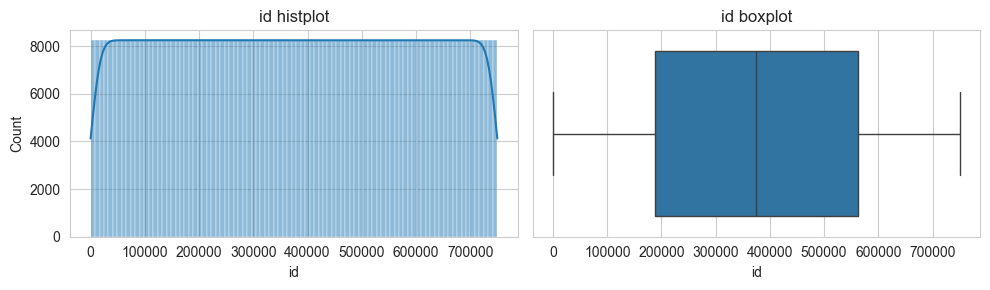

Describe:


,index,id
0,count,750000.000000
1,mean,374999.500000
2,std,216506.495284
3,min,0.000000
4,25%,187499.750000
5,50%,374999.500000
6,75%,562499.250000
7,max,749999.000000


No outliers


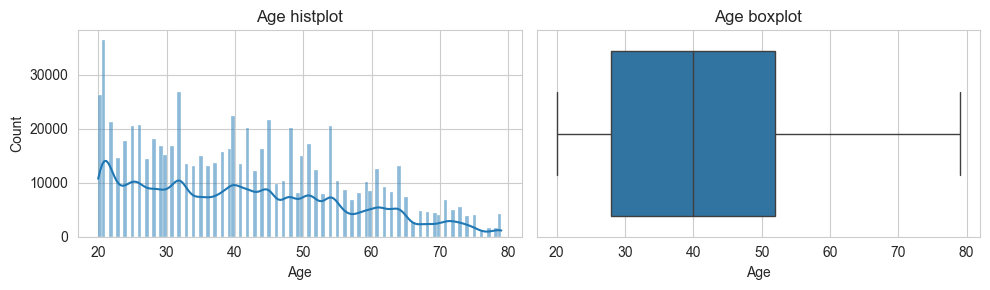

Describe:


,index,Age
0,count,750000.000000
1,mean,41.420404
2,std,15.175049
3,min,20.000000
4,25%,28.000000
5,50%,40.000000
6,75%,52.000000
7,max,79.000000


No outliers


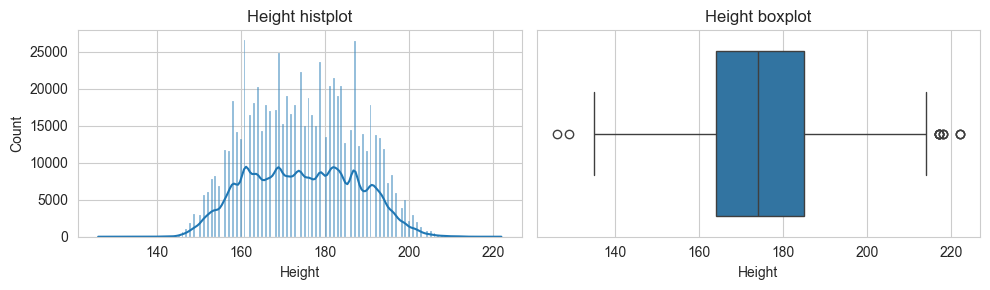

Describe:


,index,Height
0,count,750000.000000
1,mean,174.697685
2,std,12.824496
3,min,126.000000
4,25%,164.000000
5,50%,174.000000
6,75%,185.000000
7,max,222.000000


Outliers:


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
16231,16231,male,40,217.0,118.0,28.0,120.0,40.9,240.0
28136,28136,male,41,217.0,132.0,27.0,113.0,41.0,218.0
52405,52405,male,47,222.0,128.0,29.0,109.0,41.3,227.0
84554,84554,male,45,222.0,128.0,8.0,99.0,40.5,55.0
157816,157816,male,35,217.0,77.0,29.0,115.0,40.9,218.0
222696,222696,female,41,129.0,41.0,26.0,102.0,40.9,164.0
224520,224520,male,38,218.0,68.0,27.0,117.0,41.0,218.0
286079,286079,male,60,217.0,118.0,27.0,110.0,41.1,232.0
374815,374815,male,35,218.0,126.0,30.0,105.0,40.7,218.0
402608,402608,male,26,217.0,118.0,5.0,88.0,39.1,20.0


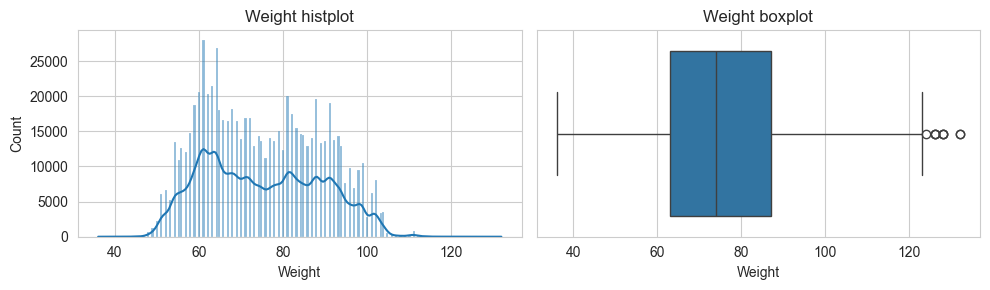

Describe:


,index,Weight
0,count,750000.000000
1,mean,75.145668
2,std,13.982704
3,min,36.000000
4,25%,63.000000
5,50%,74.000000
6,75%,87.000000
7,max,132.000000


Outliers:


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
28136,28136,male,41,217.0,132.0,27.0,113.0,41.0,218.0
52405,52405,male,47,222.0,128.0,29.0,109.0,41.3,227.0
76593,76593,male,21,204.0,128.0,6.0,81.0,38.9,14.0
84554,84554,male,45,222.0,128.0,8.0,99.0,40.5,55.0
275271,275271,male,38,208.0,124.0,28.0,107.0,40.7,205.0
374815,374815,male,35,218.0,126.0,30.0,105.0,40.7,218.0
414921,414921,male,65,209.0,126.0,28.0,101.0,41.1,209.0
439957,439957,male,47,218.0,132.0,18.0,94.0,40.7,105.0
678986,678986,male,62,211.0,126.0,28.0,112.0,40.6,246.0


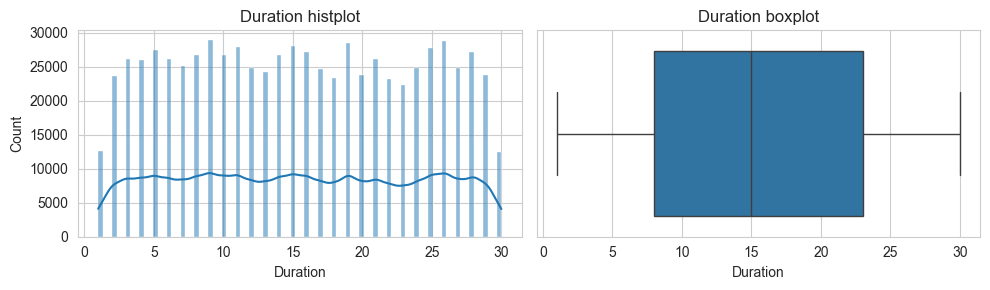

Describe:


,index,Duration
0,count,750000.000000
1,mean,15.421015
2,std,8.354095
3,min,1.000000
4,25%,8.000000
5,50%,15.000000
6,75%,23.000000
7,max,30.000000


No outliers


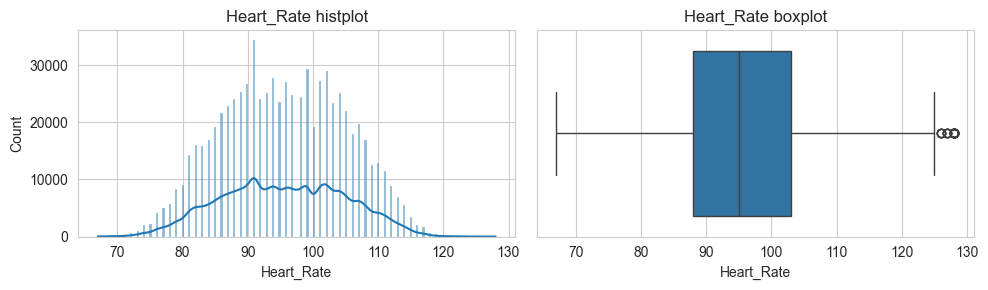

Describe:


,index,Heart_Rate
0,count,750000.000000
1,mean,95.483995
2,std,9.449845
3,min,67.000000
4,25%,88.000000
5,50%,95.000000
6,75%,103.000000
7,max,128.000000


Outliers:


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14209,14209,male,64,185.0,90.0,29.0,127.0,40.9,295.0
21179,21179,male,38,188.0,93.0,29.0,128.0,41.2,289.0
33592,33592,male,69,184.0,89.0,30.0,128.0,40.9,289.0
100095,100095,male,77,183.0,89.0,29.0,128.0,41.0,289.0
100974,100974,male,45,189.0,90.0,28.0,128.0,40.9,289.0
113701,113701,male,69,187.0,93.0,30.0,128.0,40.9,295.0
140361,140361,male,59,186.0,93.0,30.0,128.0,40.9,295.0
143588,143588,male,37,189.0,93.0,30.0,128.0,40.9,289.0
143656,143656,male,63,179.0,81.0,29.0,128.0,41.0,289.0
161839,161839,male,32,187.0,89.0,30.0,128.0,40.9,289.0


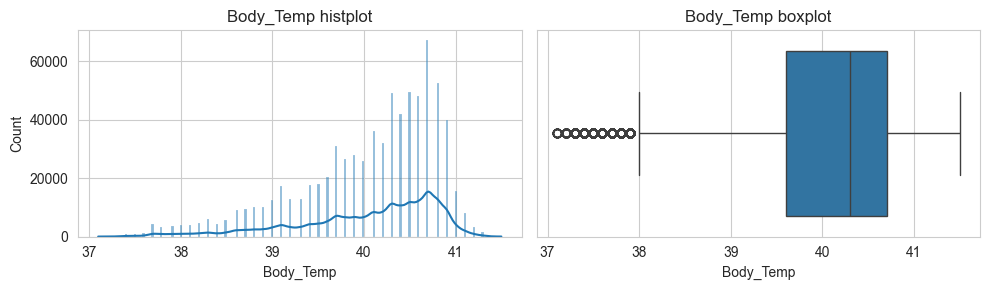

Describe:


,index,Body_Temp
0,count,750000.000000
1,mean,40.036253
2,std,0.779875
3,min,37.100000
4,25%,39.600000
5,50%,40.300000
6,75%,40.700000
7,max,41.500000


Outliers:


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
17,17,female,51,171.0,71.0,1.0,77.0,37.7,3.0
40,40,female,71,178.0,79.0,1.0,76.0,37.6,4.0
66,66,female,32,158.0,57.0,1.0,76.0,37.9,4.0
105,105,male,41,195.0,93.0,2.0,81.0,37.5,5.0
132,132,female,40,156.0,58.0,2.0,81.0,37.8,7.0
...,...,...,...,...,...,...,...,...,...
749740,749740,male,26,194.0,88.0,1.0,80.0,37.9,3.0
749892,749892,male,20,190.0,90.0,2.0,77.0,37.7,2.0
749907,749907,male,40,179.0,78.0,2.0,84.0,37.7,6.0
749914,749914,female,31,153.0,53.0,1.0,83.0,37.8,4.0


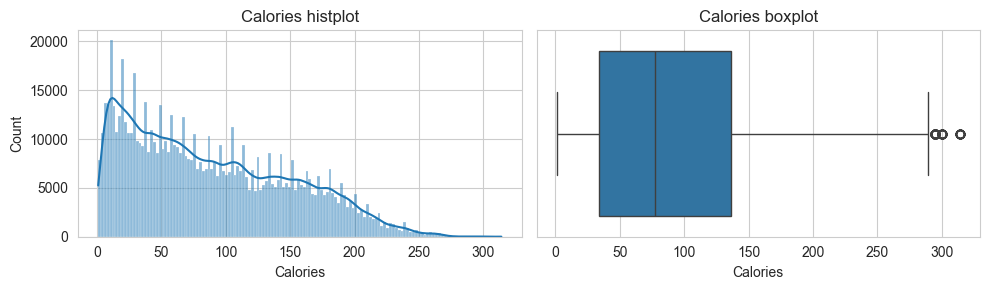

Describe:


,index,Calories
0,count,750000.000000
1,mean,88.282781
2,std,62.395349
3,min,1.000000
4,25%,34.000000
5,50%,77.000000
6,75%,136.000000
7,max,314.000000


Outliers:


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
10378,10378,male,75,180.0,79.0,30.0,120.0,41.2,295.0
10730,10730,male,60,205.0,114.0,30.0,119.0,40.8,295.0
14209,14209,male,64,185.0,90.0,29.0,127.0,40.9,295.0
19879,19879,male,72,186.0,93.0,30.0,125.0,41.0,295.0
20288,20288,male,75,178.0,76.0,29.0,120.0,40.9,295.0
...,...,...,...,...,...,...,...,...,...
715444,715444,male,72,191.0,97.0,28.0,120.0,40.9,295.0
716858,716858,male,70,182.0,86.0,29.0,120.0,40.9,295.0
718029,718029,male,33,198.0,96.0,29.0,121.0,40.9,300.0
732529,732529,male,57,195.0,97.0,29.0,120.0,41.1,314.0


In [11]:
for col in num_cols:
    numeric_analysis(df,col)

# Observations
1. Although there are outliers, they still fall within 'normal' bounds and no need to suspect misreadings
2. As regression model such as LGBMRegressor or CatBoostRegressor will be used, there is no need to cap or bin the values

# 3. Univariate Analysis - Categorical Analysis

In [12]:
def categorical_analysis(df,col):
    # Count Plot with labels
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].set_title(f"{col} count plot")
    plot = sns.countplot(df,x=col,ax=axs[0], hue=col, palette='cool')
    # Add count/percentage labels to each bar
    total = len(df[col].dropna())
    for container in plot.containers:
        for bar in container:
            height = bar.get_height()
            count = int(height)
            percentage = f'{100 * height/total:.1f}%'
            plot.annotate(f'{count}\n({percentage})',
                          xy=(bar.get_x() + bar.get_width()/2, height),
                          xytext=(0, 3),  # 3 points vertical offset
                          textcoords="offset points",
                          ha='center', va='bottom',
                          fontsize=9)

    # Value Counts into pie chart
    value_counts = df[col].value_counts()
    axs[1].pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette('cool', len(value_counts)))
    axs[1].set_title('Percentage Distribution')

    plt.tight_layout()
    plt.show()

    print(f"Unique counts: {df[col].nunique()}")

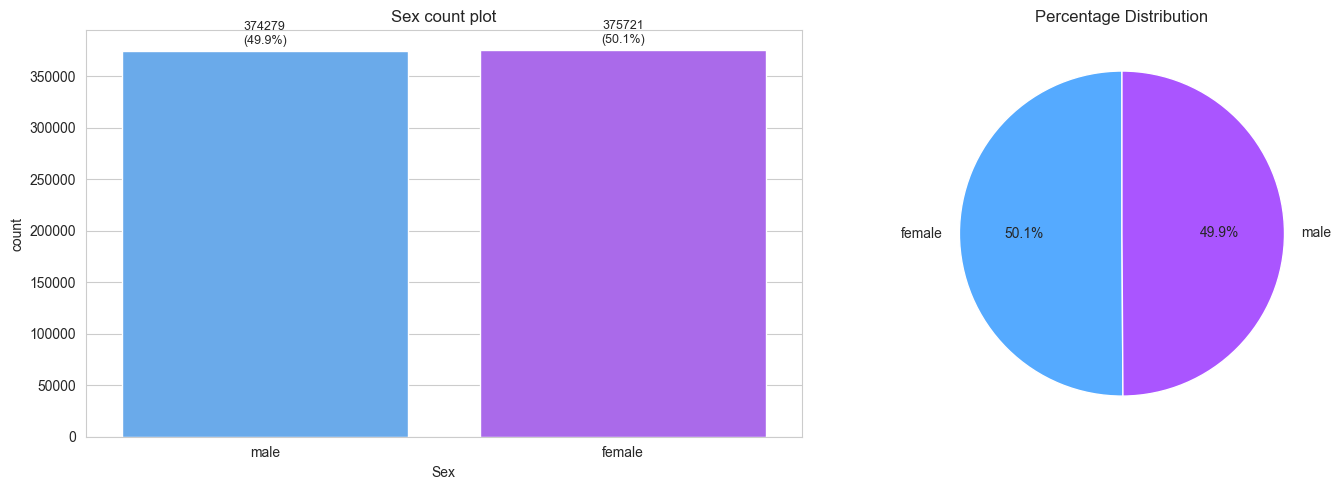

Unique counts: 2


In [13]:
for col in cat_cols:
    categorical_analysis(df,col)

# 4a. Multivariate Analysis - Numeric

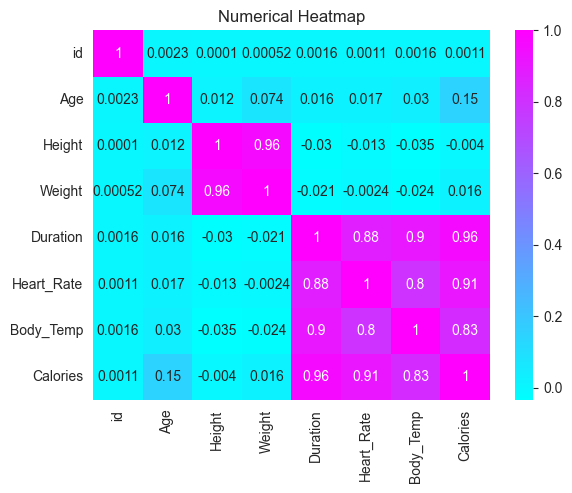

In [14]:
fig = plt.Figure(figsize=(10,10))
plt.title("Numerical Heatmap")
sns.heatmap(df[num_cols].corr(),annot=True,cmap='cool')
plt.show()

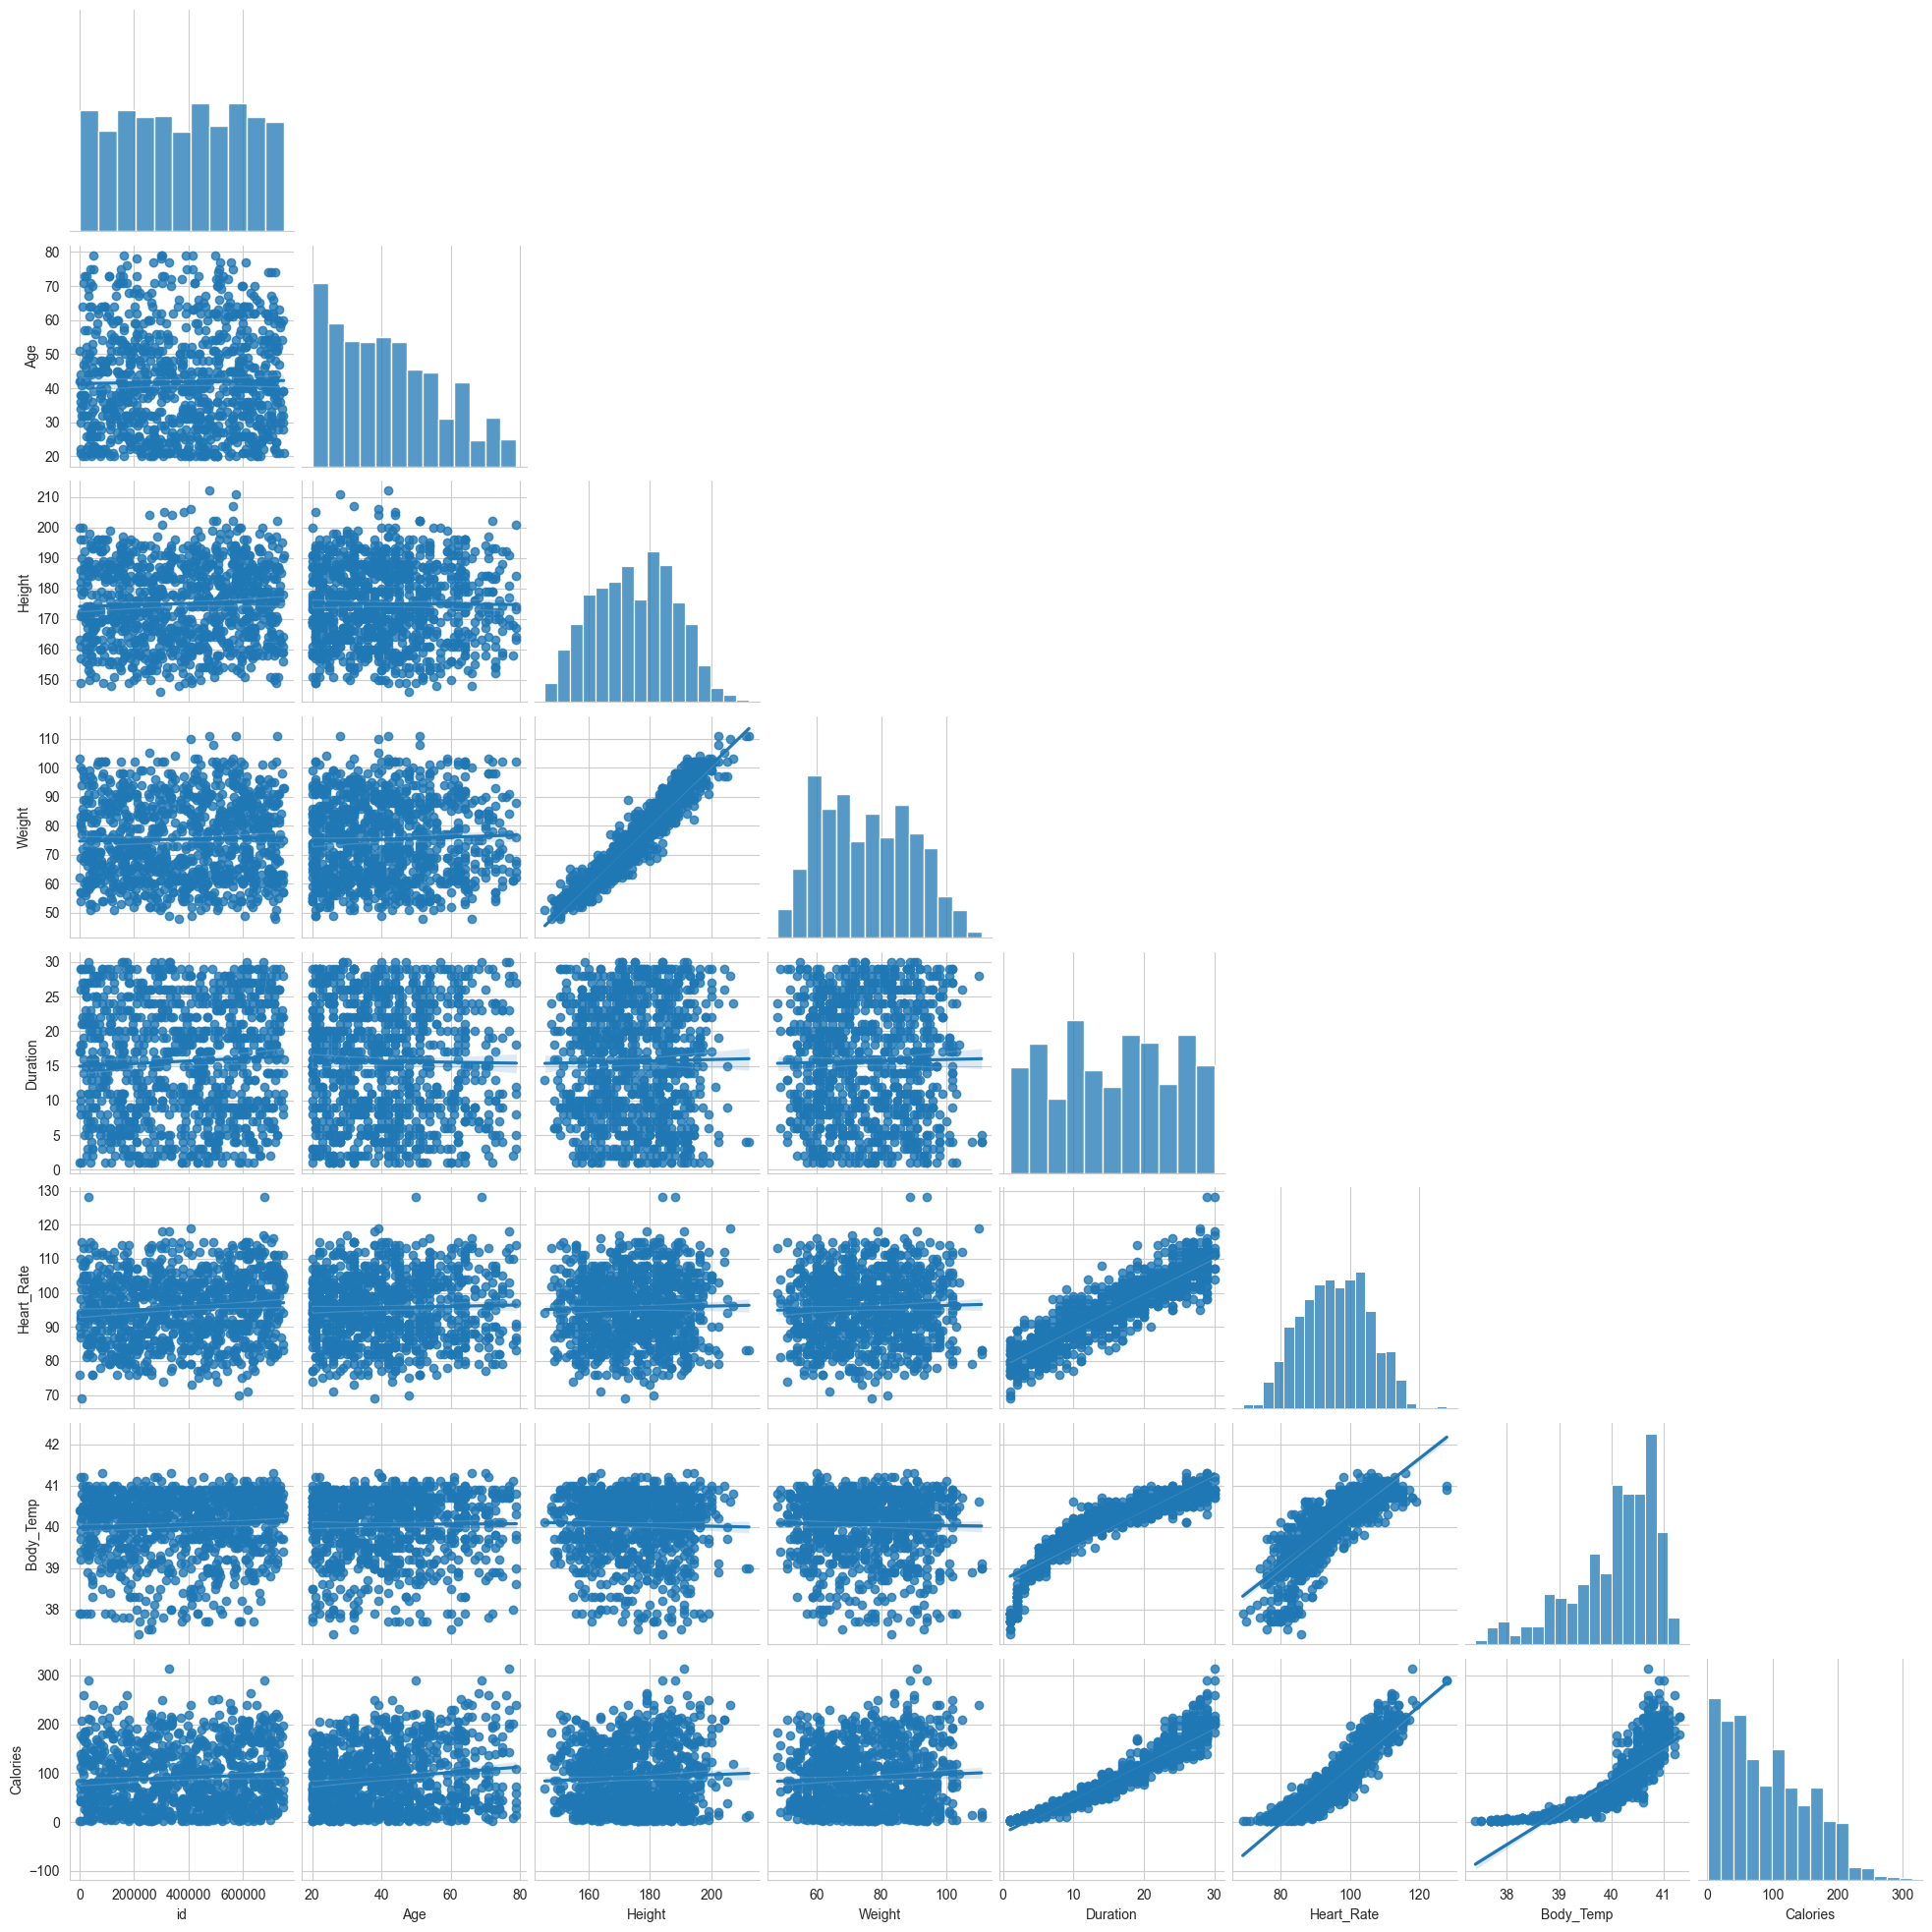

In [15]:
sns.pairplot(df.sample(1000, random_state=43), kind='reg', height=2.5, corner=True) 
plt.show()

# Observations
1. There is multicolinearity however as features are all valid we will keep them and experiment with creating interaction features during feature engineering
2. There are also a 50-50 split m-f therefore no need to do anything

# 4b. Multivariate Analysis : Categorical Columns

1. Chi Squared Test
- The null hypothesis H0 is that there is no relationship between two categorical values --> This forms the expected value 
- The alternate hypothesis H1 is that there is a relationship between two categorical values
- The formula measures the squared difference between the expected value and the observed value
- The p value is then used to determine the test results
- p<=0.05 --> null hypothesis are rejected
- p>0.05 --> null hypothesis interpretations are accepted

In [16]:
from scipy.stats import chi2_contingency

In [17]:
def chi_square_test(df, cat_cols, correction=True, alpha=0.05):

    results = []
    
    for i, col1 in enumerate(cat_cols):
        for col2 in cat_cols[i+1:]:
            # Creates contingency Table
            contingency_table = pd.crosstab(df[col1], df[col2])
            
            # Skip if either column has only 1 unique value (no variation)
            if len(contingency_table) == 1 or len(contingency_table.columns) == 1:
                continue
                
            chi2, p_value, dof, expected = chi2_contingency(
                contingency_table, 
                correction=correction
            )
            
            # Calculate Cramer's V (measure of association strength)
            n = contingency_table.sum().sum()
            cramers_v = np.sqrt(chi2 / (n * min(contingency_table.shape[0]-1, contingency_table.shape[1]-1)))
            
            results.append({
                'Feature1': col1,
                'Feature2': col2,
                'Chi2': chi2,
                'p_value': p_value,
                'dof': dof,
                'Cramers_V': cramers_v,
                'Significant': p_value < alpha
            })
    
    return pd.DataFrame(results)

# Usage
chi_results = chi_square_test(df, cat_cols)
    



# 4c. Multivariate Analysis : Categorical - Numerical

<Axes: >

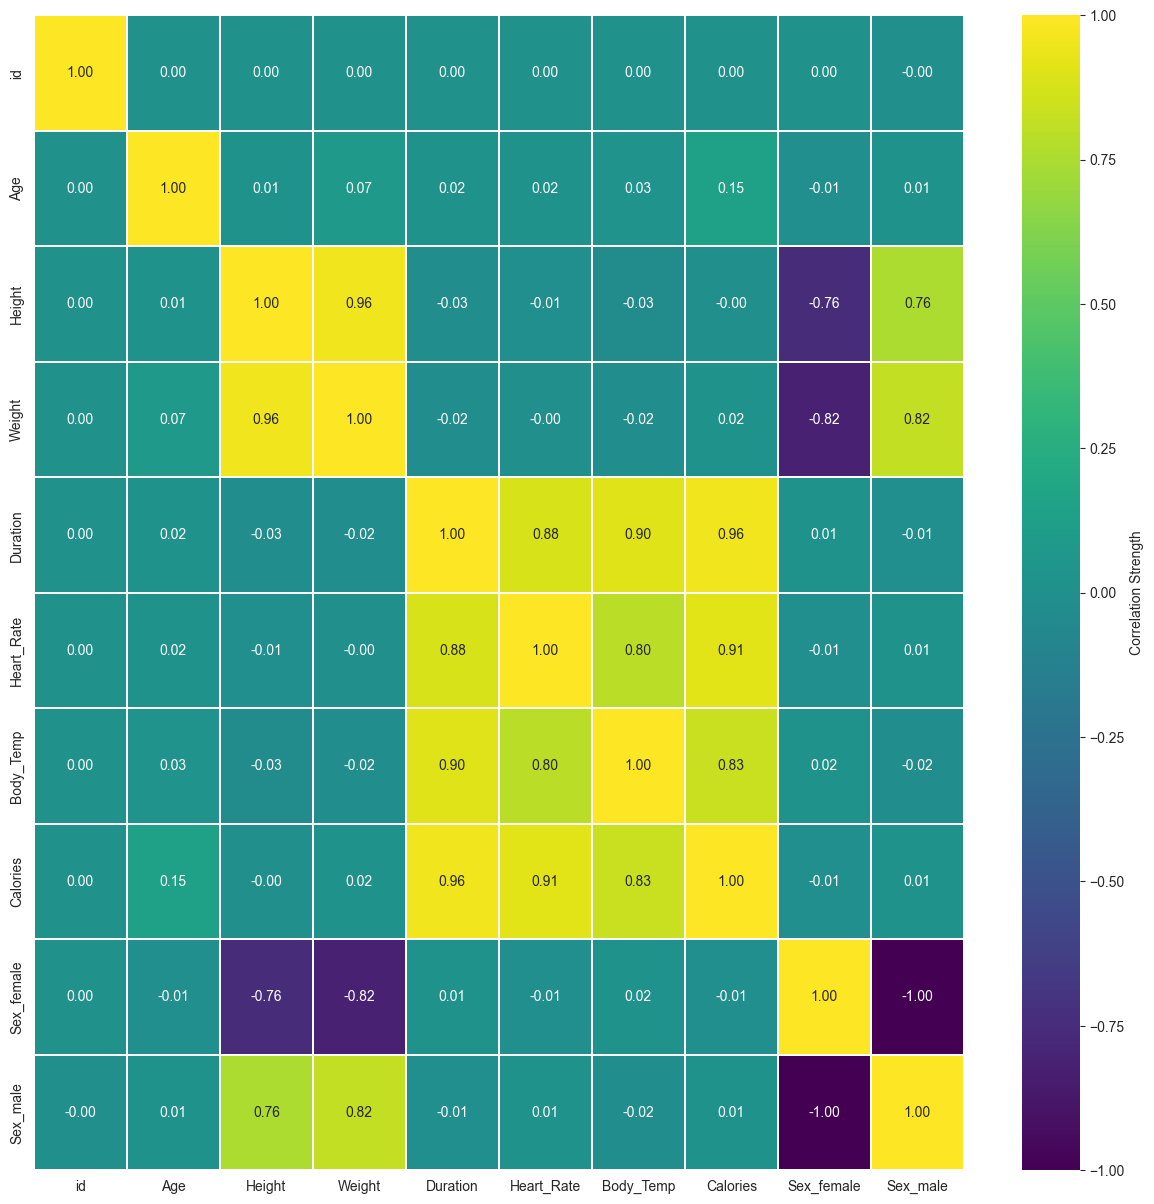

In [18]:
encoded_df = pd.get_dummies(df,drop_first =False)
df_corr = encoded_df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(df_corr, cmap='viridis', fmt='.2f', annot=True,linewidths=0.3,cbar=True, cbar_kws={'label': 'Correlation Strength'}
)

# Observations

1. Height and weight are quite correlated to male and female 


# 5. Data Quality Checks

In [19]:
import missingno as msno

<Axes: >

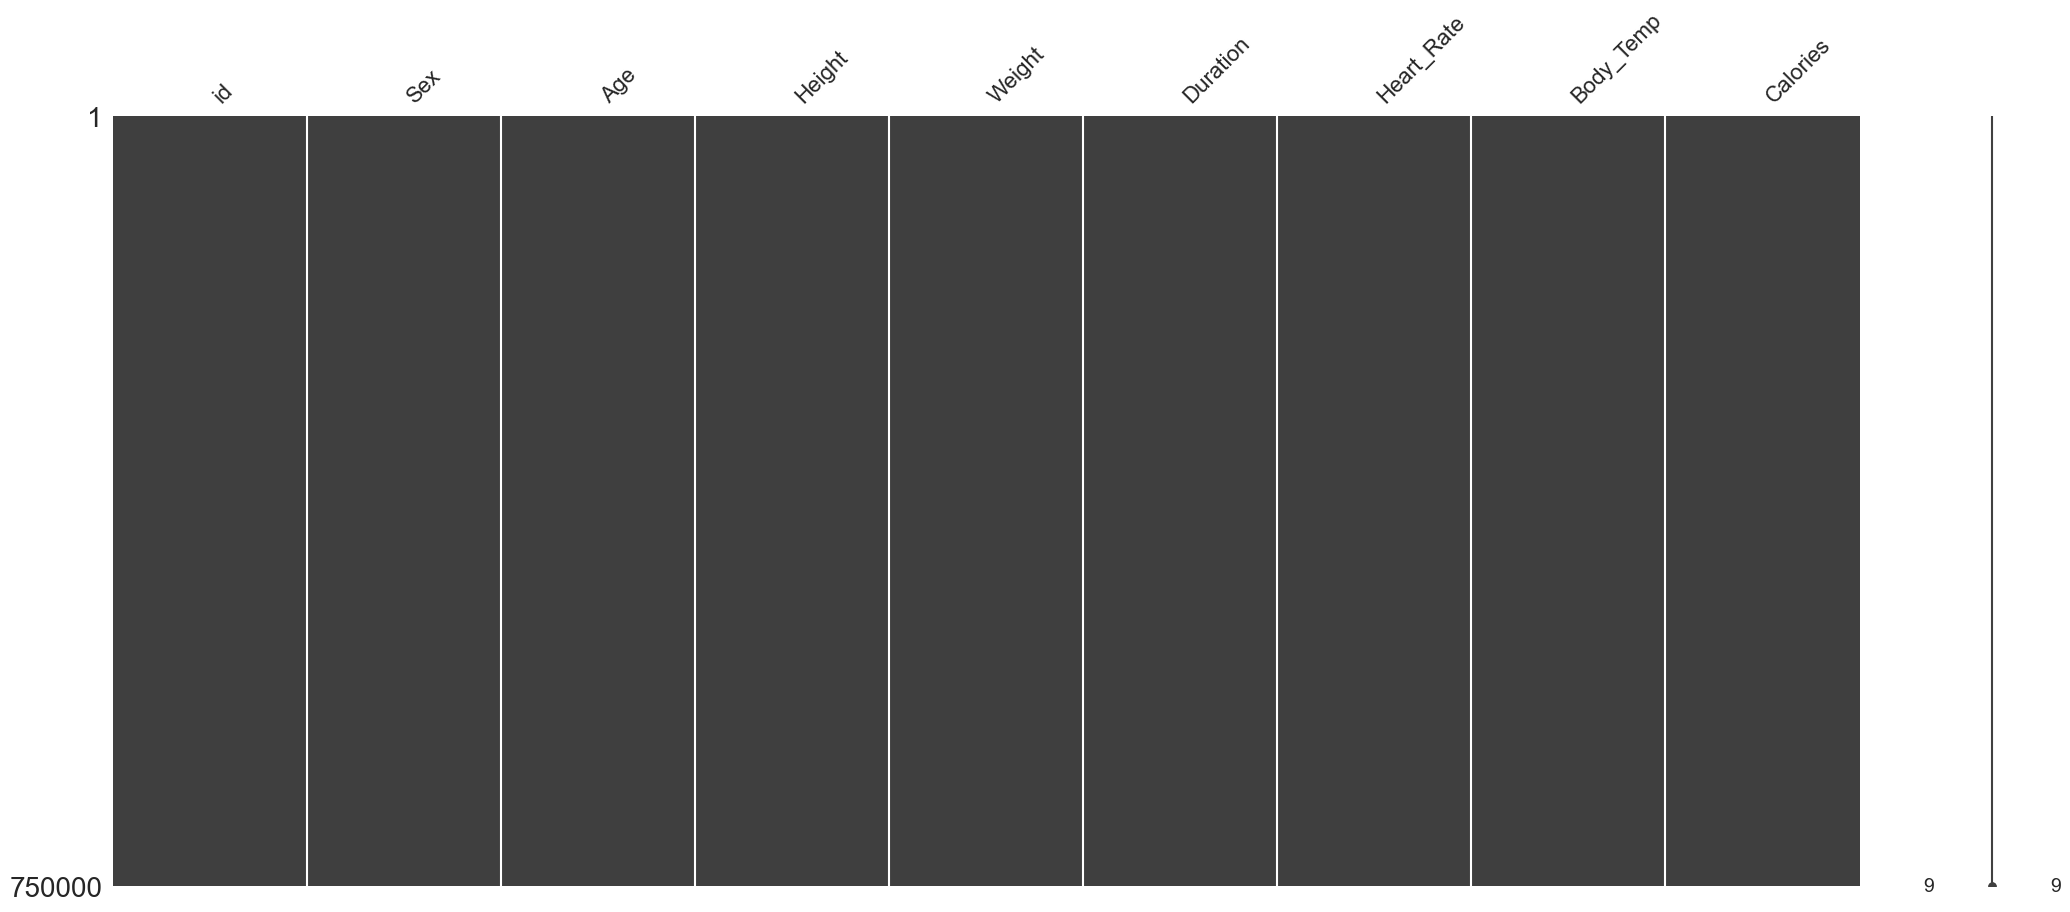

In [20]:
msno.matrix(df)

<Axes: >

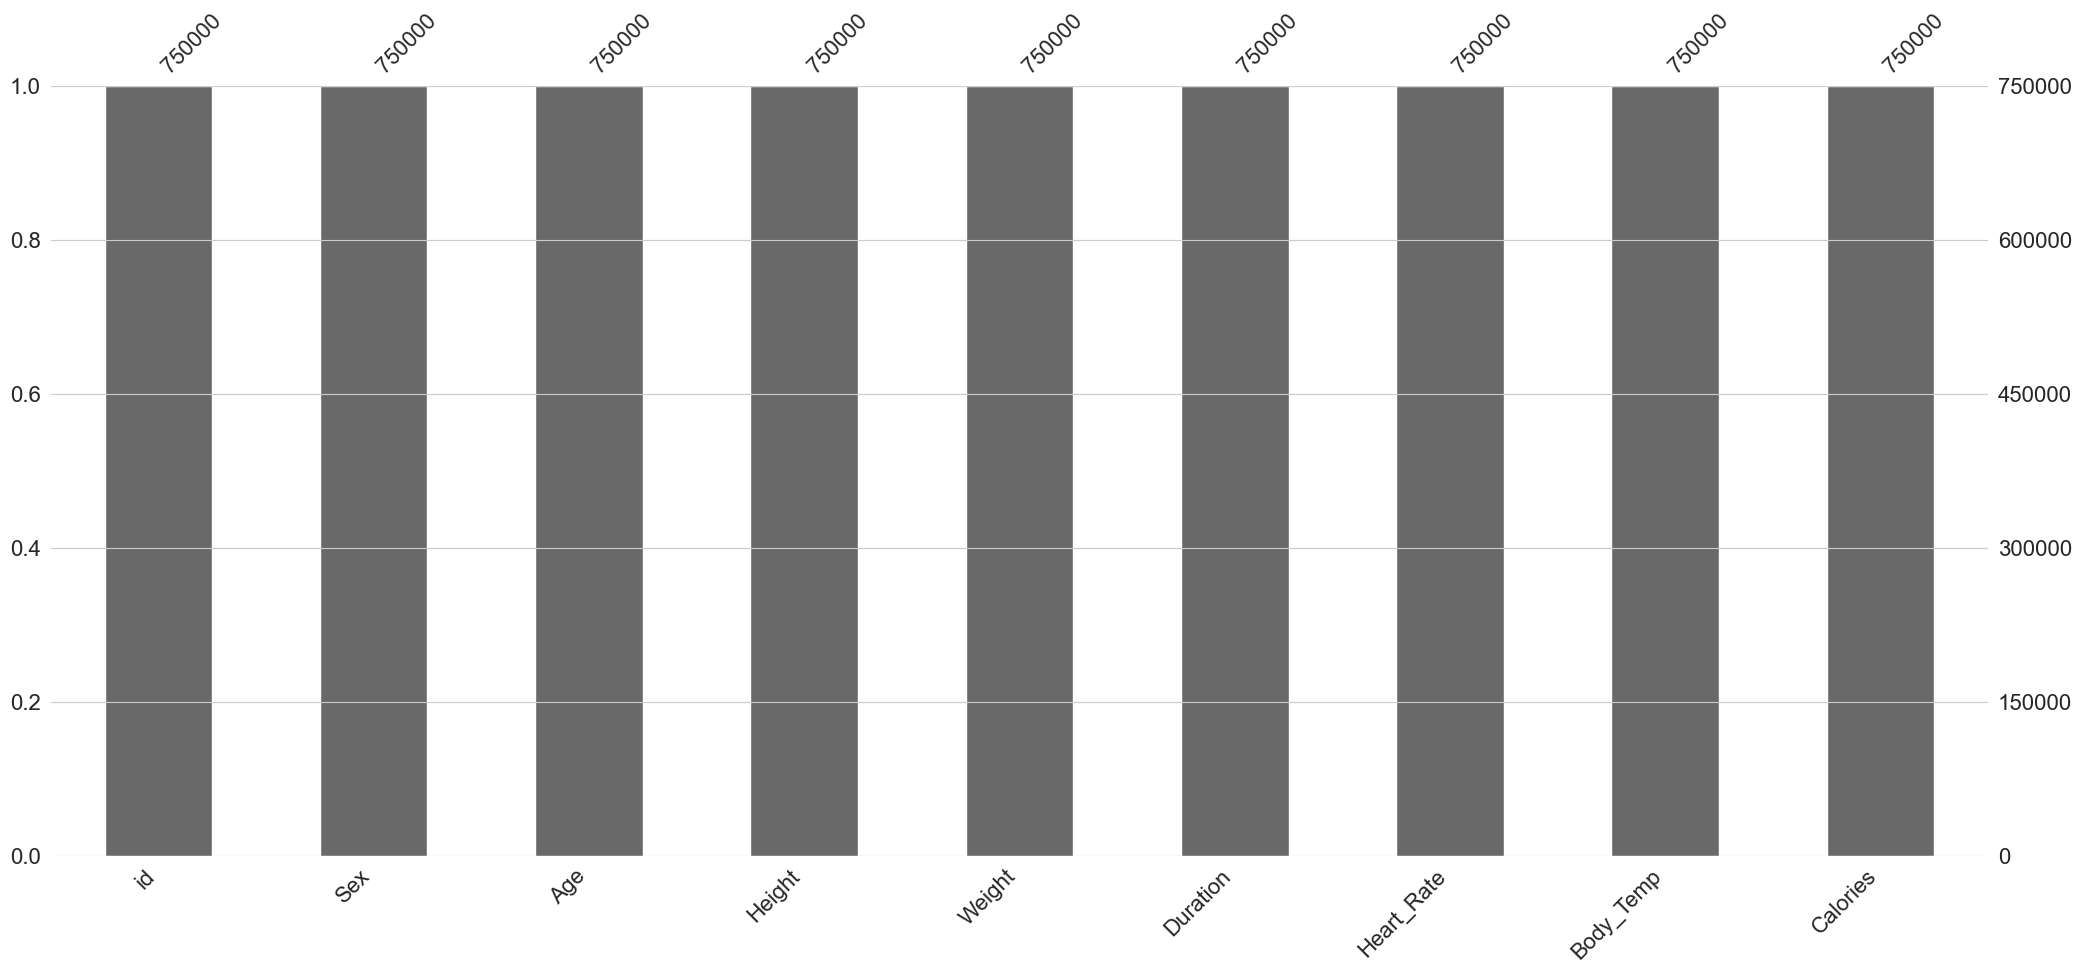

In [21]:
msno.bar(df)

In [22]:
df.duplicated().sum()

0

# Observations
1. No missing features
2. No duplicated features

# Feature Engineering recommendations
1. Using tree based model which may not require interaction features 
2. Encode Sex when using xgboost

In [23]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import root_mean_squared_log_error
import optuna
from sklearn.model_selection import cross_val_score

In [24]:
df_xgb = pd.get_dummies(df, columns=['Sex']) # xgboost does not handle categorical data therefore should be onehotencoded or label encoded if high cardinality


In [25]:
df['Sex'] = df['Sex'].astype('category') # for LGBM and CatBoost must be converted to categorical


In [26]:
df.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [27]:
X_xgb = df_xgb.drop(columns=['id','Calories'])
y_xgb = df_xgb['Calories']
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb,y_xgb,test_size=0.2)

In [28]:
X = df.drop(columns=['id','Calories'])
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [29]:
cat_cols

Index(['Sex'], dtype='object')

In [30]:
X.dtypes

Sex           category
Age              int64
Height         float64
Weight         float64
Duration       float64
Heart_Rate     float64
Body_Temp      float64
dtype: object

In [31]:
cat_features_indices = [X_train.columns.get_loc(col) for col in cat_cols]


In [33]:
def objective(trial):
    params = {
        'loss_function': 'RMSE',  
        'iterations': trial.suggest_int('n_estimators', 460, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 0.2, log=True),
        'l2_leaf_reg': 3.571408776536747,
        'depth': 10,
        'verbose': 0,
        'early_stopping_rounds':50,
        'cat_features': cat_features_indices,
        'eval_metric': 'RMSLE',
        'task_type': 'GPU'
    }

    model = CatBoostRegressor(**params)

    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    preds = np.clip(preds, 0, None) 
    rmsle = root_mean_squared_log_error(y_test, preds)

    return -rmsle

study = optuna.create_study(direction='maximize',sampler = optuna.samplers.RandomSampler(seed=42))

study.optimize(objective,n_trials=200)

[I 2025-05-19 18:49:08,835] A new study created in memory with name: no-name-414f252d-b704-472a-a3dd-718dfcfe58c4


[W 2025-05-19 18:49:08,882] Trial 0 failed with parameters: {'n_estimators': 475, 'learning_rate': 0.19328294024559517} because of the following error: CatBoostError("tools/enum_parser/enum_serialization_runtime/enum_runtime.cpp:70: Key 'RMSLE' not found in enum ELossFunction. Valid options are: 'Logloss', 'CrossEntropy', 'CtrFactor', 'Focal', 'RMSE', 'LogCosh', 'Lq', 'MAE', 'Quantile', 'MultiQuantile', 'Expectile', 'LogLinQuantile', 'MAPE', 'Poisson', 'MSLE', 'MedianAbsoluteError', 'SMAPE', 'Huber', 'Tweedie', 'Cox', 'RMSEWithUncertainty', 'MultiClass', 'MultiClassOneVsAll', 'PairLogit', 'PairLogitPairwise', 'YetiRank', 'YetiRankPairwise', 'QueryRMSE', 'GroupQuantile', 'QuerySoftMax', 'QueryCrossEntropy', 'StochasticFilter', 'LambdaMart', 'StochasticRank', 'PythonUserDefinedPerObject', 'PythonUserDefinedMultiTarget', 'UserPerObjMetric', 'UserQuerywiseMetric', 'R2', 'NumErrors', 'FairLoss', 'AUC', 'Accuracy', 'BalancedAccuracy', 'BalancedErrorRate', 'BrierScore', 'Precision', 'Recall',

CatBoostError: tools/enum_parser/enum_serialization_runtime/enum_runtime.cpp:70: Key 'RMSLE' not found in enum ELossFunction. Valid options are: 'Logloss', 'CrossEntropy', 'CtrFactor', 'Focal', 'RMSE', 'LogCosh', 'Lq', 'MAE', 'Quantile', 'MultiQuantile', 'Expectile', 'LogLinQuantile', 'MAPE', 'Poisson', 'MSLE', 'MedianAbsoluteError', 'SMAPE', 'Huber', 'Tweedie', 'Cox', 'RMSEWithUncertainty', 'MultiClass', 'MultiClassOneVsAll', 'PairLogit', 'PairLogitPairwise', 'YetiRank', 'YetiRankPairwise', 'QueryRMSE', 'GroupQuantile', 'QuerySoftMax', 'QueryCrossEntropy', 'StochasticFilter', 'LambdaMart', 'StochasticRank', 'PythonUserDefinedPerObject', 'PythonUserDefinedMultiTarget', 'UserPerObjMetric', 'UserQuerywiseMetric', 'R2', 'NumErrors', 'FairLoss', 'AUC', 'Accuracy', 'BalancedAccuracy', 'BalancedErrorRate', 'BrierScore', 'Precision', 'Recall', 'F1', 'TotalF1', 'F', 'MCC', 'ZeroOneLoss', 'HammingLoss', 'HingeLoss', 'Kappa', 'WKappa', 'LogLikelihoodOfPrediction', 'NormalizedGini', 'PRAUC', 'PairAccuracy', 'AverageGain', 'QueryAverage', 'QueryAUC', 'PFound', 'PrecisionAt', 'RecallAt', 'MAP', 'NDCG', 'DCG', 'FilteredDCG', 'MRR', 'ERR', 'SurvivalAft', 'MultiRMSE', 'MultiRMSEWithMissingValues', 'MultiLogloss', 'MultiCrossEntropy', 'Combination'. 

In [ ]:
optuna.visualization.plot_param_importances(study)


In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
best_params  = study.best_params

In [ ]:
print(best_params)


{'n_estimators': 494, 'learning_rate': 0.16199779834618494}


In [ ]:
model_cat = CatBoostRegressor(**best_params)
model_cat.fit(X_train,y_train,cat_features=cat_features_indices)
y_preds = model_cat.predict(X_test)
rmsle = root_mean_squared_log_error(y_preds,y_test)

0:	learn: 53.0082691	total: 54.4ms	remaining: 26.8s
1:	learn: 45.1553161	total: 87.6ms	remaining: 21.6s
2:	learn: 38.5287287	total: 124ms	remaining: 20.3s
3:	learn: 32.9578650	total: 159ms	remaining: 19.5s
4:	learn: 28.2689310	total: 192ms	remaining: 18.8s
5:	learn: 24.4468124	total: 225ms	remaining: 18.3s
6:	learn: 21.1315897	total: 257ms	remaining: 17.9s
7:	learn: 18.3290366	total: 292ms	remaining: 17.8s
8:	learn: 16.0151175	total: 326ms	remaining: 17.5s
9:	learn: 14.0750360	total: 359ms	remaining: 17.4s
10:	learn: 12.4148849	total: 393ms	remaining: 17.3s
11:	learn: 11.0441406	total: 428ms	remaining: 17.2s
12:	learn: 9.9204553	total: 460ms	remaining: 17s
13:	learn: 8.9550243	total: 495ms	remaining: 17s
14:	learn: 8.1469124	total: 526ms	remaining: 16.8s
15:	learn: 7.5006336	total: 560ms	remaining: 16.7s
16:	learn: 6.9542398	total: 590ms	remaining: 16.6s
17:	learn: 6.4949014	total: 625ms	remaining: 16.5s
18:	learn: 6.1159348	total: 655ms	remaining: 16.4s
19:	learn: 5.8125942	total: 687

ValueError: Root Mean Squared Logarithmic Error cannot be used when targets contain values less than or equal to -1.

In [ ]:
print(rmsle)

0.06173375849197145


In [ ]:
df_test.head(1)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8


In [ ]:
X_final = df_test.drop(columns='id')
X_final['Sex'] = X_final['Sex'].astype('category')

In [ ]:
df_sample['Calories'] = model_lgbm.predict(X_final).clip(min=0)


[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: depth


In [ ]:
df_sample.describe()

,id,Calories
count,250000.000000,250000.000000
mean,874999.500000,88.246972
std,72168.927986,62.292541
min,750000.000000,0.000000
25%,812499.750000,34.045532
50%,874999.500000,76.568353
75%,937499.250000,135.532754
max,999999.000000,304.595477


In [ ]:
df_sample.to_csv('submission.csv',index=False)